# Environment Set Up

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visiulazation
import matplotlib.pyplot as plt

#image processing
import cv2

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-y_t2ll00 because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Face Detector

We are going to use a **pretrained** Haar Cascade Classifier optimized for frontal faces.

In [9]:
# Image auxiliary functions
def loadImg(path):
    img = cv2.imread(path)
    return np.copy(img)

def show_image(image):
    plt.figure(figsize=(18,15))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [81]:
class FaceDetector():

    def __init__(self,faceCascadePath):
        self.faceCascade=cv2.CascadeClassifier(faceCascadePath)

    def detect(self, image, scaleFactor=1.1, minNeighbors=5, minSize=(30,30)):
        #function return rectangle coordinates of faces for given image
        rects=self.faceCascade.detectMultiScale(
            image, 
            scaleFactor=scaleFactor, 
            minNeighbors=minNeighbors, 
            minSize=minSize
        )
        
        return rects

    def detect_face(self, image, scaleFactor, minNeighbors, minSize):
        # face will detected in gray image
        image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        faces=self.detect(
            image_gray,
            scaleFactor=scaleFactor,
            minNeighbors=minNeighbors,
            minSize=minSize
        )

        for x, y, w, h in faces:
            #detected faces shown in color image
            cv2.rectangle(image,(x,y),(x+w, y+h),(127, 255,0),3)

        show_image(image)


In [83]:
pretrained_model_path = "/dataset/face-detection/haarcascade_frontalface.xml"
fd = FaceDetector(pretrained_model_path)

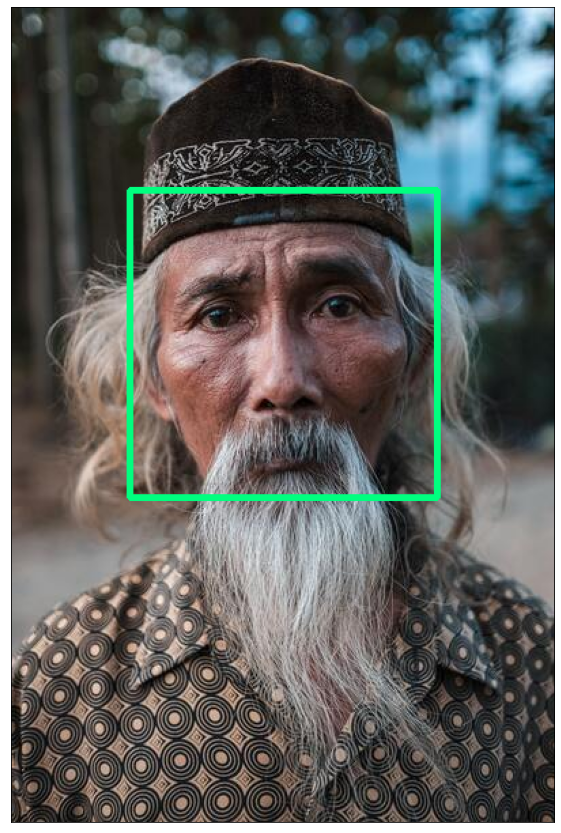

In [84]:
face = loadImg("/dataset/face-detection/face.jpg")
fd.detect_face(image=face,scaleFactor=1.05, minNeighbors=3, minSize=(30,30))